<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Exercise
---------------------------------------------
Training exercise
------------------

Problem statement 

>   *“file  ex1data1.txt contains the dataset for sample linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.”*


1. Exercise 1 : use Matplotlib libraries to plot this dataset. you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Plot population on x axis and profit on y- axis. Label the dataset and plot graph

2. Exercise 2: use Scikit linear regression algorithm to predict profit as a function of population. The function used out here is y = Mx + C, where the parameter M & C will provide the equation for best fit line (linear regression). Further, y – is profit and X – is population. So purpose of this exercise is derive a simple equation which define profit as a function of population.

3. Exercise 3 : use the parameters obtained for linear regression to plot the linear fit in the same scatter plot used to visualize the data. Purpose is the draw the line y = MX + C, obtained above. You will be able to visualize that straight line is the best fit possible given this data set. For a better representation we will need to fit through a quardratic function of the form y = AX2  + MX + C or an higher order polynomial.

## 1. Linear Regression Model 
-----------------------------------------

### Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Importing Datasets

In [404]:
data = pd.read_csv('/content/regression-data.txt',header=None,names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [405]:
data.info()  # no null values and no column is type object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [406]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


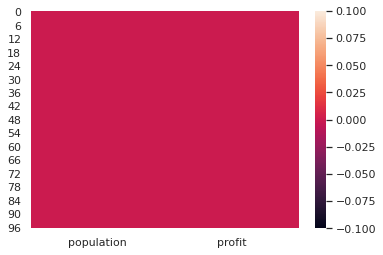

In [407]:
sns.heatmap(data.isna()) # no null values 

### Visualization

1. Exercise 1 : scatterplot of population vs profit

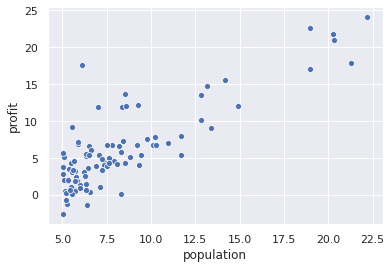

In [408]:
sns.scatterplot(x='population',y='profit',data=data)

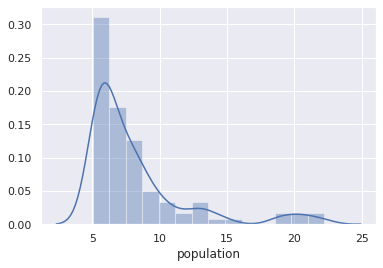

In [409]:
sns.distplot(data['population'])

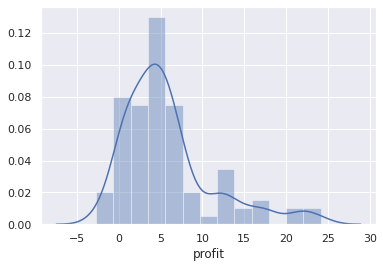

In [410]:
sns.distplot(data['profit'])

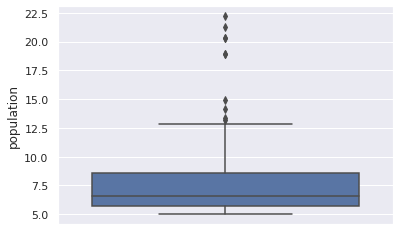

In [411]:
sns.boxplot(y='population',data=data)

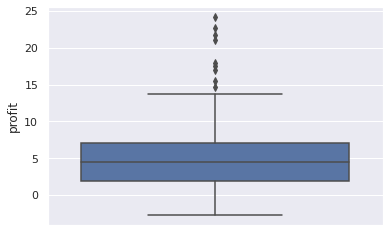

In [412]:
sns.boxplot(y='profit',data=data)

### Feature scaling

In [0]:
from sklearn.preprocessing import StandardScaler as sc

In [0]:
sc1=sc()

x=data[['population']]
y=data[['profit']]

In [0]:
x=sc1.fit_transform(x)

sc2=sc()
y=sc2.fit_transform(y)

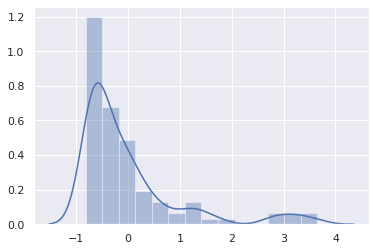

In [416]:
sns.distplot(x)

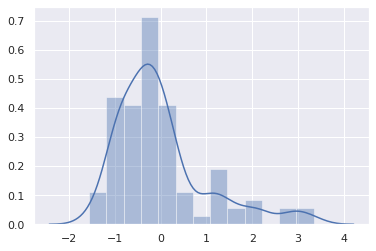

In [417]:
sns.distplot(y)

### Data splitting for training and testing

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.3,random_state=15)

### Training a model

Exercise 2: use Scikit linear regression algorithm to predict profit as a function of population. The function used out here is y = Mx + C, where the parameter M & C will provide the equation for best fit line (linear regression). Further, y – is profit and X – is population. So purpose of this exercise is derive a simple equation which define profit as a function of population

In [0]:
from sklearn.linear_model import LinearRegression as lr

In [0]:
model=lr(fit_intercept=True)

In [422]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [423]:
#getting the coefficients
model.coef_,model.intercept_

(array([[0.78789713]]), array([0.03394074]))

In [425]:
model.score(x_train,y_train) # training time, accuracy is 58%

0.5759959074114946

 **so the equation is :**

```
 y     = mx   + c
 
profit = 0.78789713 * population + (0.03394074) 
```

### Testing a model

Exercise 3 : use the parameters obtained for linear regression to plot the linear fit in the same scatter plot used to visualize the data. Purpose is the draw the line y = MX + C, obtained above. You will be able to visualize that straight line is the best fit possible given this data set. 

In [0]:
predictions=model.predict(x_test)

### Evaluating the Accuracy of the model

In [0]:
from sklearn.metrics import r2_score,mean_squared_error as mse

In [428]:
np.sqrt(mse(y_test,predictions))

0.5156082222065377

In [429]:
r2_score(y_test,predictions)  # r2 score is 83% 

0.826339351637532

Text(0.5, 1.0, ' \n Linear Regression model for population & profit')

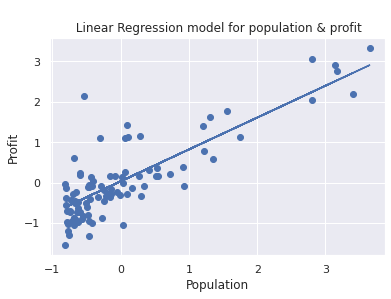

In [430]:
#Plotting the res

plt.scatter(x,y)
plt.plot(x,model.predict(x))
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title(' \n Linear Regression model for population & profit')

### Note : 

The linear regressional model's accuracy is **74%**. 

Now we will implement the **Polynomial Regression equation** to improve the accuracy.

## 2. Polynomial model

In [0]:
from sklearn.pipeline import make_pipeline as mp
from sklearn.preprocessing import PolynomialFeatures as pf

In [0]:
pipe=mp( pf(include_bias=False,degree=2), lr(fit_intercept=True))

In [433]:
# Training the data
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
pred=pipe.predict(x_test)

In [435]:
np.sqrt(mse(y_test,pred))

0.5191784268654452

In [436]:
r2_score(y_test,pred)

0.8239260829452943

## 3. RidgeCV

In [0]:
from sklearn.linear_model import RidgeCV as rcv

In [0]:
alpha=np.append( [0.1,0.001,0.01,0.0001] , np.linspace(1,20,30)) 
ridge=rcv(alphas=alpha,scoring='neg_mean_squared_error', cv=8)

In [439]:
ridge.fit(x_train,y_train)

RidgeCV(alphas=array([1.00000000e-01, 1.00000000e-03, 1.00000000e-02, 1.00000000e-04,
       1.00000000e+00, 1.65517241e+00, 2.31034483e+00, 2.96551724e+00,
       3.62068966e+00, 4.27586207e+00, 4.93103448e+00, 5.58620690e+00,
       6.24137931e+00, 6.89655172e+00, 7.55172414e+00, 8.20689655e+00,
       8.86206897e+00, 9.51724138e+00, 1.01724138e+01, 1.08275862e+01,
       1.14827586e+01, 1.21379310e+01, 1.27931034e+01, 1.34482759e+01,
       1.41034483e+01, 1.47586207e+01, 1.54137931e+01, 1.60689655e+01,
       1.67241379e+01, 1.73793103e+01, 1.80344828e+01, 1.86896552e+01,
       1.93448276e+01, 2.00000000e+01]),
        cv=8, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [440]:
ridge.alpha_

0.0001

In [0]:
pred=pipe.predict(x_test)

In [442]:
np.sqrt(mse(y_test,pred))

0.5191784268654452

In [443]:
r2_score(y_test,pred)

0.8239260829452943

## 4.  RidgeCv with polynomial Features

In [450]:
pipe=mp( pf(degree=2,include_bias=False),
         rcv(alphas=alpha,scoring='neg_mean_squared_error', cv=10) 
        )
pipe

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-01, 1.00000000e-03, 1.00000000e-02, 1.00000000e-04,
       1.00000000e+00, 1.65517241e+00, 2.31034483e+00, 2.96551724e+00,
       3.62068966e+00, 4.27586207e+00, 4.93103448e+00, 5.58620690e+00,
       6.241...
       8.86206897e+00, 9.51724138e+00, 1.01724138e+01, 1.08275862e+01,
       1.14827586e+01, 1.21379310e+01, 1.27931034e+01, 1.34482759e+01,
       1.41034483e+01, 1.47586207e+01, 1.54137931e+01, 1.60689655e+01,
       1.67241379e+01, 1.73793103e+01, 1.80344828e+01, 1.86896552e+01,
       1.93448276e+01, 2.00000000e+01]),
                         cv=10, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring='neg_mean_squared_error',
                         store_cv_values=Fa

In [451]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-01, 1.00000000e-03, 1.00000000e-02, 1.00000000e-04,
       1.00000000e+00, 1.65517241e+00, 2.31034483e+00, 2.96551724e+00,
       3.62068966e+00, 4.27586207e+00, 4.93103448e+00, 5.58620690e+00,
       6.241...
       8.86206897e+00, 9.51724138e+00, 1.01724138e+01, 1.08275862e+01,
       1.14827586e+01, 1.21379310e+01, 1.27931034e+01, 1.34482759e+01,
       1.41034483e+01, 1.47586207e+01, 1.54137931e+01, 1.60689655e+01,
       1.67241379e+01, 1.73793103e+01, 1.80344828e+01, 1.86896552e+01,
       1.93448276e+01, 2.00000000e+01]),
                         cv=10, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring='neg_mean_squared_error',
                         store_cv_values=Fa

In [452]:
pipe.named_steps['ridgecv'].alpha_

1.6551724137931034

In [0]:
pred=pipe.predict(x_test)

In [454]:
np.sqrt(mse(y_test,pred))

0.5225749336974441

In [455]:
r2_score(y_test,pred)

0.8216147678685584

# ANALYSIS : All the models with Accuracies
--------------------------------------------------

1. Linear model :           82.63 %
2. polynomial model :       82.39 %
3. ridge linear model :     82.39 %
4. ridge polynomial model : 82.16 %

Thus in all the models, we have got almost ***same accuracies i.e 82-83 %*** . 

To imporove the accuracy,we can apply *decision-tree or random-forest* technique.